# พลอต zonal mean สำหรับลุ่มน้ำหลักในประเทศไทย 8 ชั่วโมง เซฟเป็น shapefile
* สร้างผลิตภัณฑ์เรดาร์โมเสคในลุ่มน้ำเพื่อนำไปวิเคราะห์ใน GIS 

C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071721.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071722.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071723.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071800.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071801.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071802.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071803.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071804.shp


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\3175381863.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.91, 1])


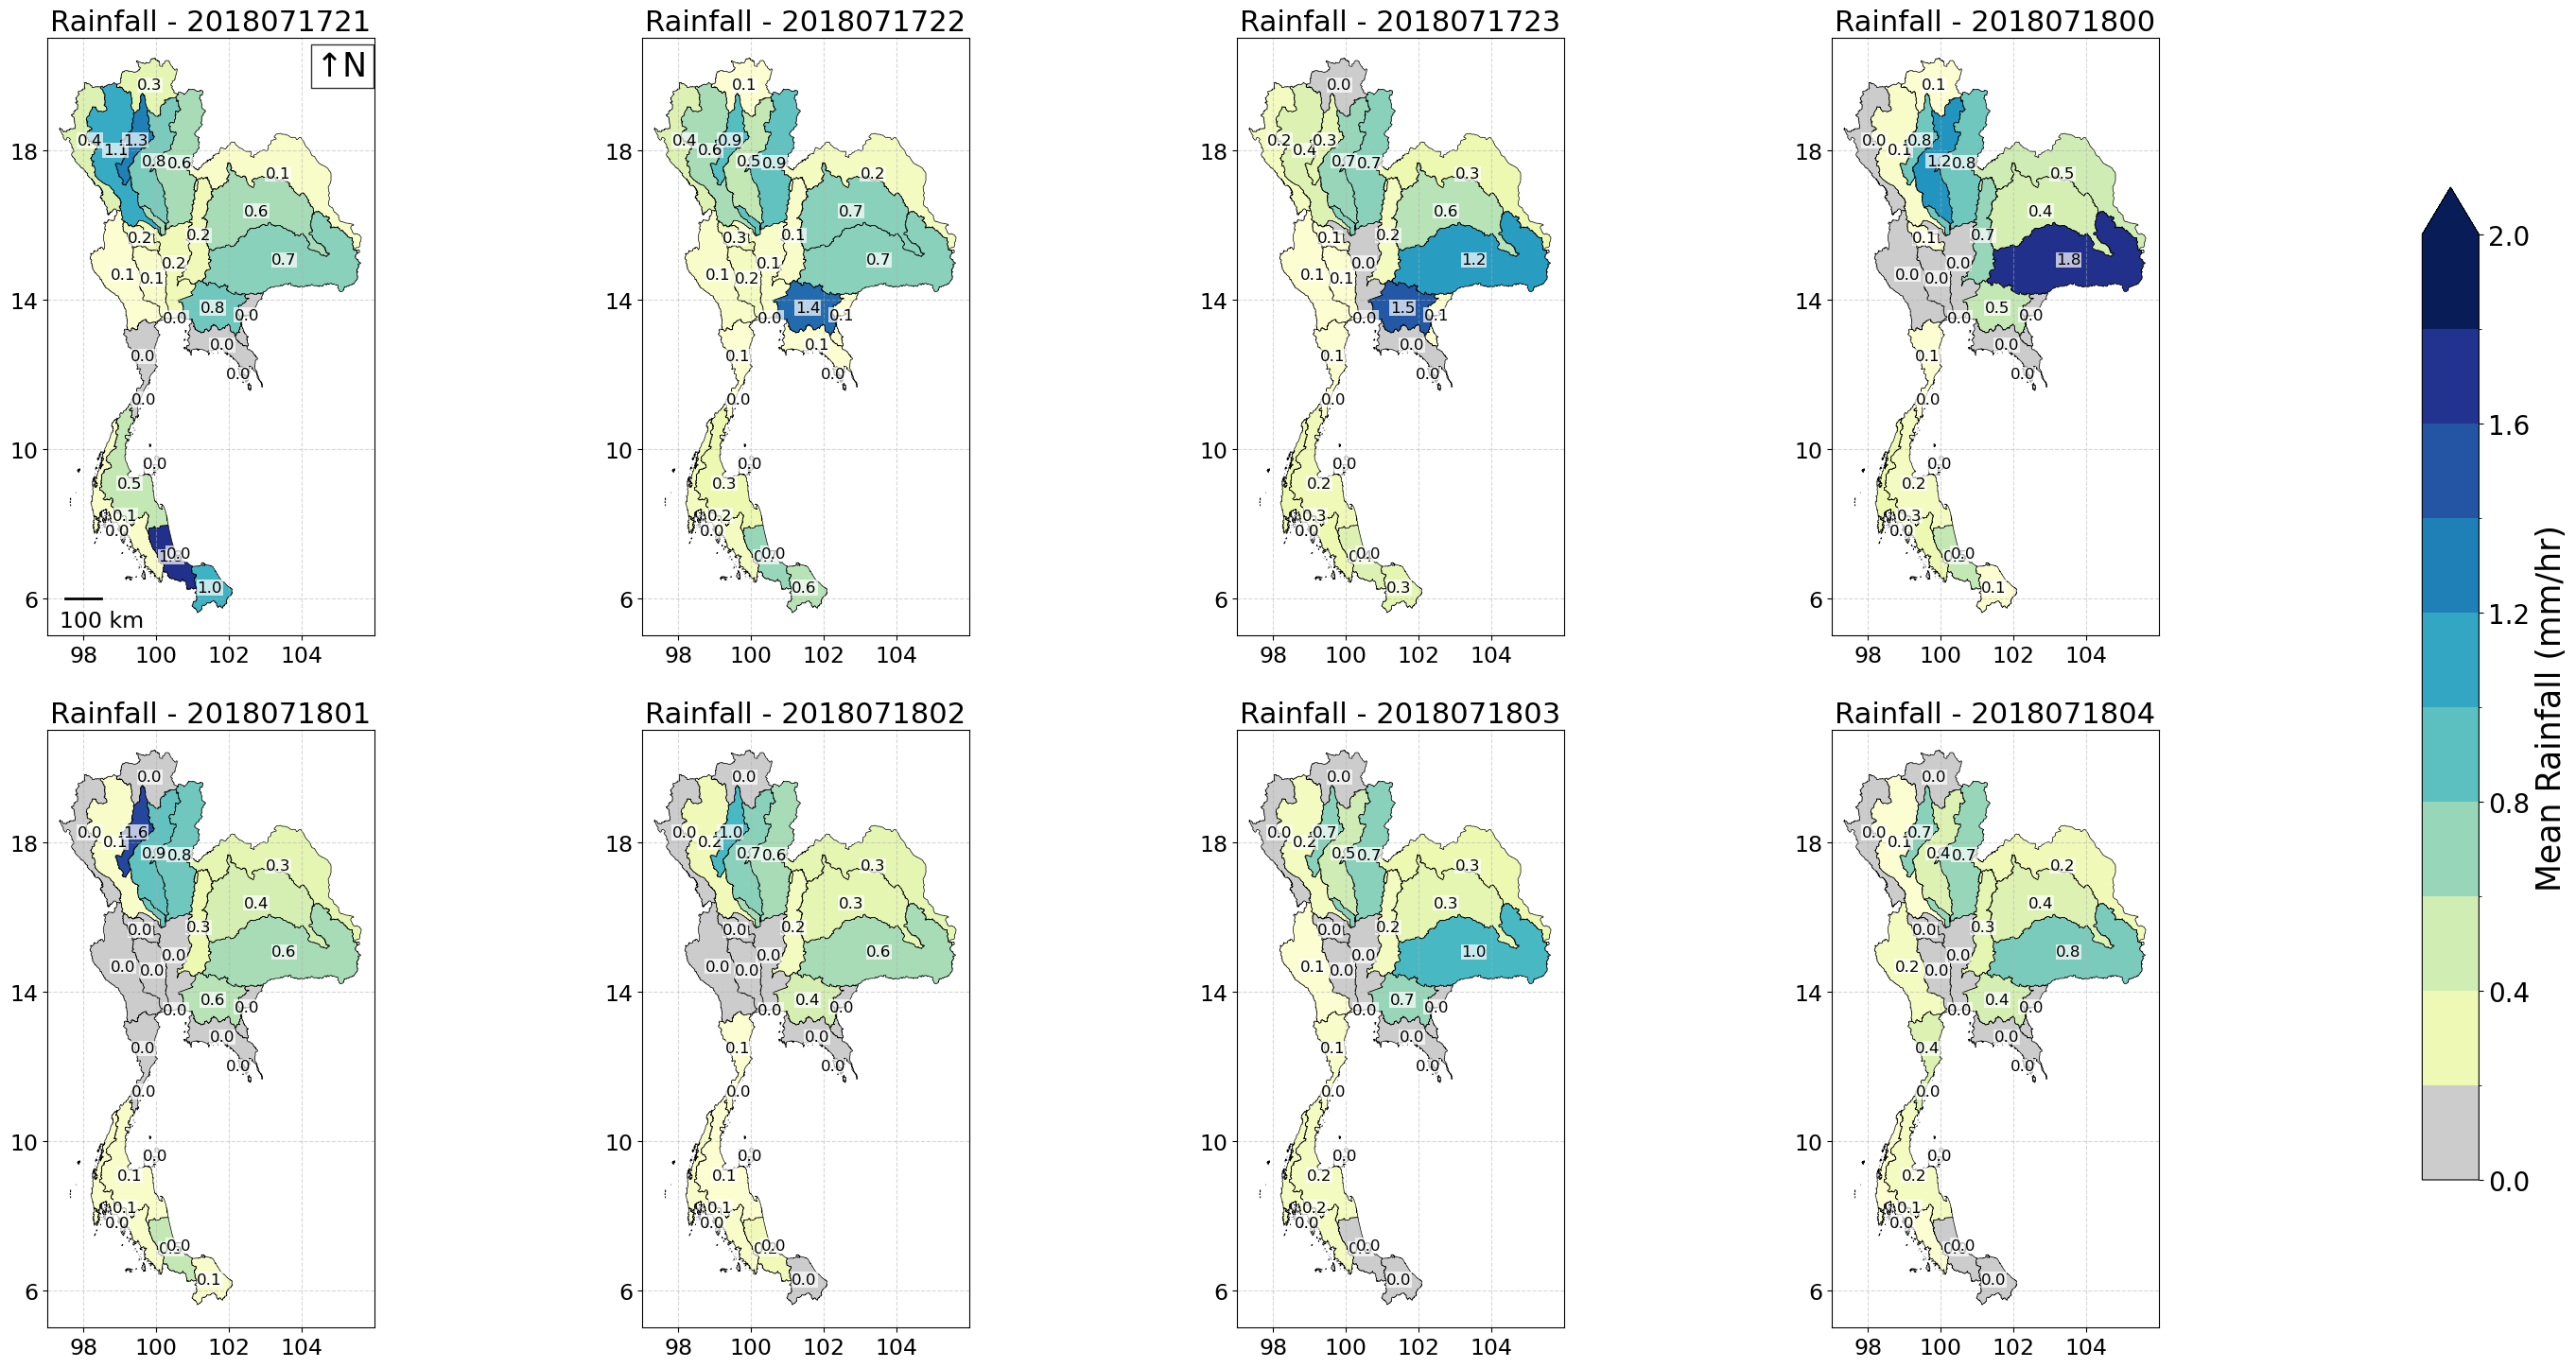

Multi-time zonal statistics map saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_mapplot\fig_2018071721.png


In [18]:
'''
2024.09.22
โค้ดนี้พัฒนาโดย รองศาสตราจารย์ ดร. นัฐพล มหาวิค ภาควิชาทรัพยากรธรรมชาติและสิ่งแวดล้อม คณะเกษตรศาสตร์ฯ มหาวิทยาลัยนเรศวร 
ในงานวิจัย เรื่อง "การวิจัยและพัฒนาผลิตภัณฑ์โมเสคฝนประมาณค่าจากเรดาร์ตรวจอากาศในพื้นที่ระดับลุ่มน้ำของประเทศไทยด้วยเทคโนโลยีภูมิสารสนเทศรหัสเปิด"
สนับสนุนทุนวิจัยโดยสํานักงานการวิจัยแห่งชาติ (วช.)  แผนงานการวิจัยและนวัตกรรมแผนงานด้านการบริหารจัดการภัยพิบัติทางธรรมชาติ 
ประจำปีงบประมาณ 2566  ตามสัญญา เลขที่ N25A660467 ผู้นำโค้ดนี้ไปใช้หรือดัดแปลงควรอ้างอิงงานวิจัยชิ้นนี้ตามหลักเกณฑ์การอ้างอิงสากล
เรียนหลักการเรดาร์และภูมิสารสนเทศ ที่ https://www.youtube.com/@Nattapon_Mahavik/playlists
หนังสือเรดาร์ตรวจอากาศทางอุตุนิยมวิทยา สำนักพิมพ์จุฬาฯ : https://www.chulabook.com/education/144567
หนังสือออนไลน์เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา สำนักพิมพ์จุฬาฯ : https://www.chulabook.com/education/205129
ติดต่อ nattaponm@nu.ac.th
'''
#พลอต zonal mean สำหรับลุ่มน้ำในประเทศไทย 8 ชั่วโมง เซฟเป็น shapefile
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
import rasterio
from rasterio.mask import mask
import math
from datetime import datetime, timedelta
import matplotlib.colors as mcolors

def calculate_zonal_statistics(raster_path, sub_basins_path):
    # Read the sub-basins shapefile
    sub_basins = gpd.read_file(sub_basins_path)

    with rasterio.open(raster_path) as src:
        # Ensure the sub-basins are in the same CRS as the raster
        if sub_basins.crs != src.crs:
            sub_basins = sub_basins.to_crs(src.crs)

        # Calculate zonal statistics
        def calculate_mean(geometry):
            try:
                out_image, out_transform = mask(src, [geometry], crop=True)
                out_image = out_image.squeeze()  # Remove single-dimensional entries
                # Use np.nanmean to calculate the mean, ignoring NaN values
                return np.nanmean(out_image[out_image != src.nodata])
            except ValueError:
                return np.nan

        sub_basins['mean_rainfall'] = sub_basins.geometry.apply(calculate_mean)

    return sub_basins


def create_custom_cmap():
    # Create a custom colormap with grey for 0 mm
    #cmap = plt.cm.jet.copy()
    cmap = plt.cm.YlGnBu.copy()
    colors = cmap(np.linspace(0, 1, 256))
    colors[:1, :] = [0.8, 0.8, 0.8, 1]  # Set the first color (0 mm) to grey
    return mcolors.ListedColormap(colors)

def plot_zonal_statistics_map(ax, sub_basins, time_hr, vmin, vmax):
    #breaks = np.linspace(vmin, vmax, 21) #20 ระดับสี
    breaks = np.linspace(vmin, vmax, 41) #40 ระดับสี
    custom_cmap = create_custom_cmap()
    norm = BoundaryNorm(breaks, custom_cmap.N)

    sub_basins.plot(column='mean_rainfall', ax=ax, cmap=custom_cmap, norm=norm, 
                    edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})

    ax.set_title(f'Rainfall - {time_hr}', fontsize=22)
    
    for idx, row in sub_basins.iterrows():
        if not np.isnan(row['mean_rainfall']):
            ax.annotate(text=f"{row['mean_rainfall']:.1f}", 
                        xy=row.geometry.centroid.coords[0],
                        ha='center', va='center', fontsize=12,
                        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5))

    ax.set_xlim(97, 106)
    ax.set_ylim(5, 21)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks([98, 100, 102, 104])
    ax.set_yticks([6, 10, 14, 18])
    ax.tick_params(labelsize=17)

def plot_multiple_maps(data_list, sub_basins_path, time_list, output_path):
    fig, axs = plt.subplots(2, 4, figsize=(30, 15))
    axs = axs.flatten()

    sub_basins = gpd.read_file(sub_basins_path)
    all_values = [data['mean_rainfall'].dropna() for data in data_list]
    all_values = np.concatenate(all_values)
    #vmin, vmax = 0, min(100, math.ceil(np.max(all_values)))
    vmin = 0
    vmax =2
    

    for i, (data, time_hr) in enumerate(zip(data_list, time_list)):
        sub_basins['mean_rainfall'] = data['mean_rainfall']
        plot_zonal_statistics_map(axs[i], sub_basins, time_hr, vmin, vmax)

    # Add colorbar
    custom_cmap = create_custom_cmap()
    norm = BoundaryNorm(np.linspace(vmin, vmax, 11), custom_cmap.N)
    sm = ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sm, cax=cbar_ax, extend='max')
    cbar.set_label('Mean Rainfall (mm/hr)', fontsize=25)
    cbar.ax.tick_params(labelsize=20)

    # Add north arrow and scale bar to the first subplot
    axs[0].text(0.98, 0.98, '↑N', transform=axs[0].transAxes, ha='right', va='top', fontsize=25,
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))
    axs[0].plot([97.5, 98.5], [6.0, 6.0], 'k-', linewidth=2, transform=axs[0].transData)
    axs[0].text(98.5, 5.7, '100 km', ha='center', va='top', fontsize=17, transform=axs[0].transData)

    plt.tight_layout(rect=[0, 0, 0.91, 1])
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show(fig)

def main(base_dir, basin_shapefile, initial_time, output_dir):
    # Create output directories
    shapefile_dir = os.path.join(output_dir, "0hourly_shapefile")
    mapplot_dir = os.path.join(output_dir, "0hourly_mapplot")
    os.makedirs(shapefile_dir, exist_ok=True)
    os.makedirs(mapplot_dir, exist_ok=True)
    
    initial_dt = datetime.strptime(initial_time, '%Y%m%d%H')
    time_list = [(initial_dt + timedelta(hours=i)).strftime('%Y%m%d%H') for i in range(8)]
    
    data_list = []
    for time_hr in time_list:
        raster_path = os.path.join(base_dir, f"{time_hr}.tif")
        if not os.path.exists(raster_path):
            print(f"File not found: {raster_path}")
            continue
        
        sub_basins_with_stats = calculate_zonal_statistics(raster_path, basin_shapefile)
        data_list.append(sub_basins_with_stats)
        
        # Save shapefile for each time step
        shapefile_output = os.path.join(shapefile_dir, f"{time_hr}.shp")
        sub_basins_with_stats.to_file(shapefile_output)
        print(f"Shapefile saved to: {shapefile_output}")
    
    # Save the map plot
    map_output_path = os.path.join(mapplot_dir, f"fig_{initial_time}.png")
    plot_multiple_maps(data_list, basin_shapefile, time_list, map_output_path)
    
    print(f"Multi-time zonal statistics map saved to: {map_output_path}")

if __name__ == "__main__":
    BASE_DIR = "../00run_batch_acchr_codes/2output/0Hourly/0Sontihn_dbz_single/0mosaic/2max_mos/0mosaics/0mfb"
    BASIN_SHAPEFILE = "../1data/1GIS/0base_map_gis/MainBasin_ONWR_Law_WGS84Geo.shp"
    INITIAL_TIME = "2018071721"
    OUTPUT_DIR = "./0Zprocessing_data/zonal_stats_output"

    main(BASE_DIR, BASIN_SHAPEFILE, INITIAL_TIME, OUTPUT_DIR)

# พลอต zonal mean สำหรับลุ่มน้ำหลักในประเทศไทย หนึ่งชั่วโมง เซฟเป็น shapefile

Zonal statistics map saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_mapplot\2018071722.png


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\4058168844.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output\0hourly_shapefile\2018071722.shp


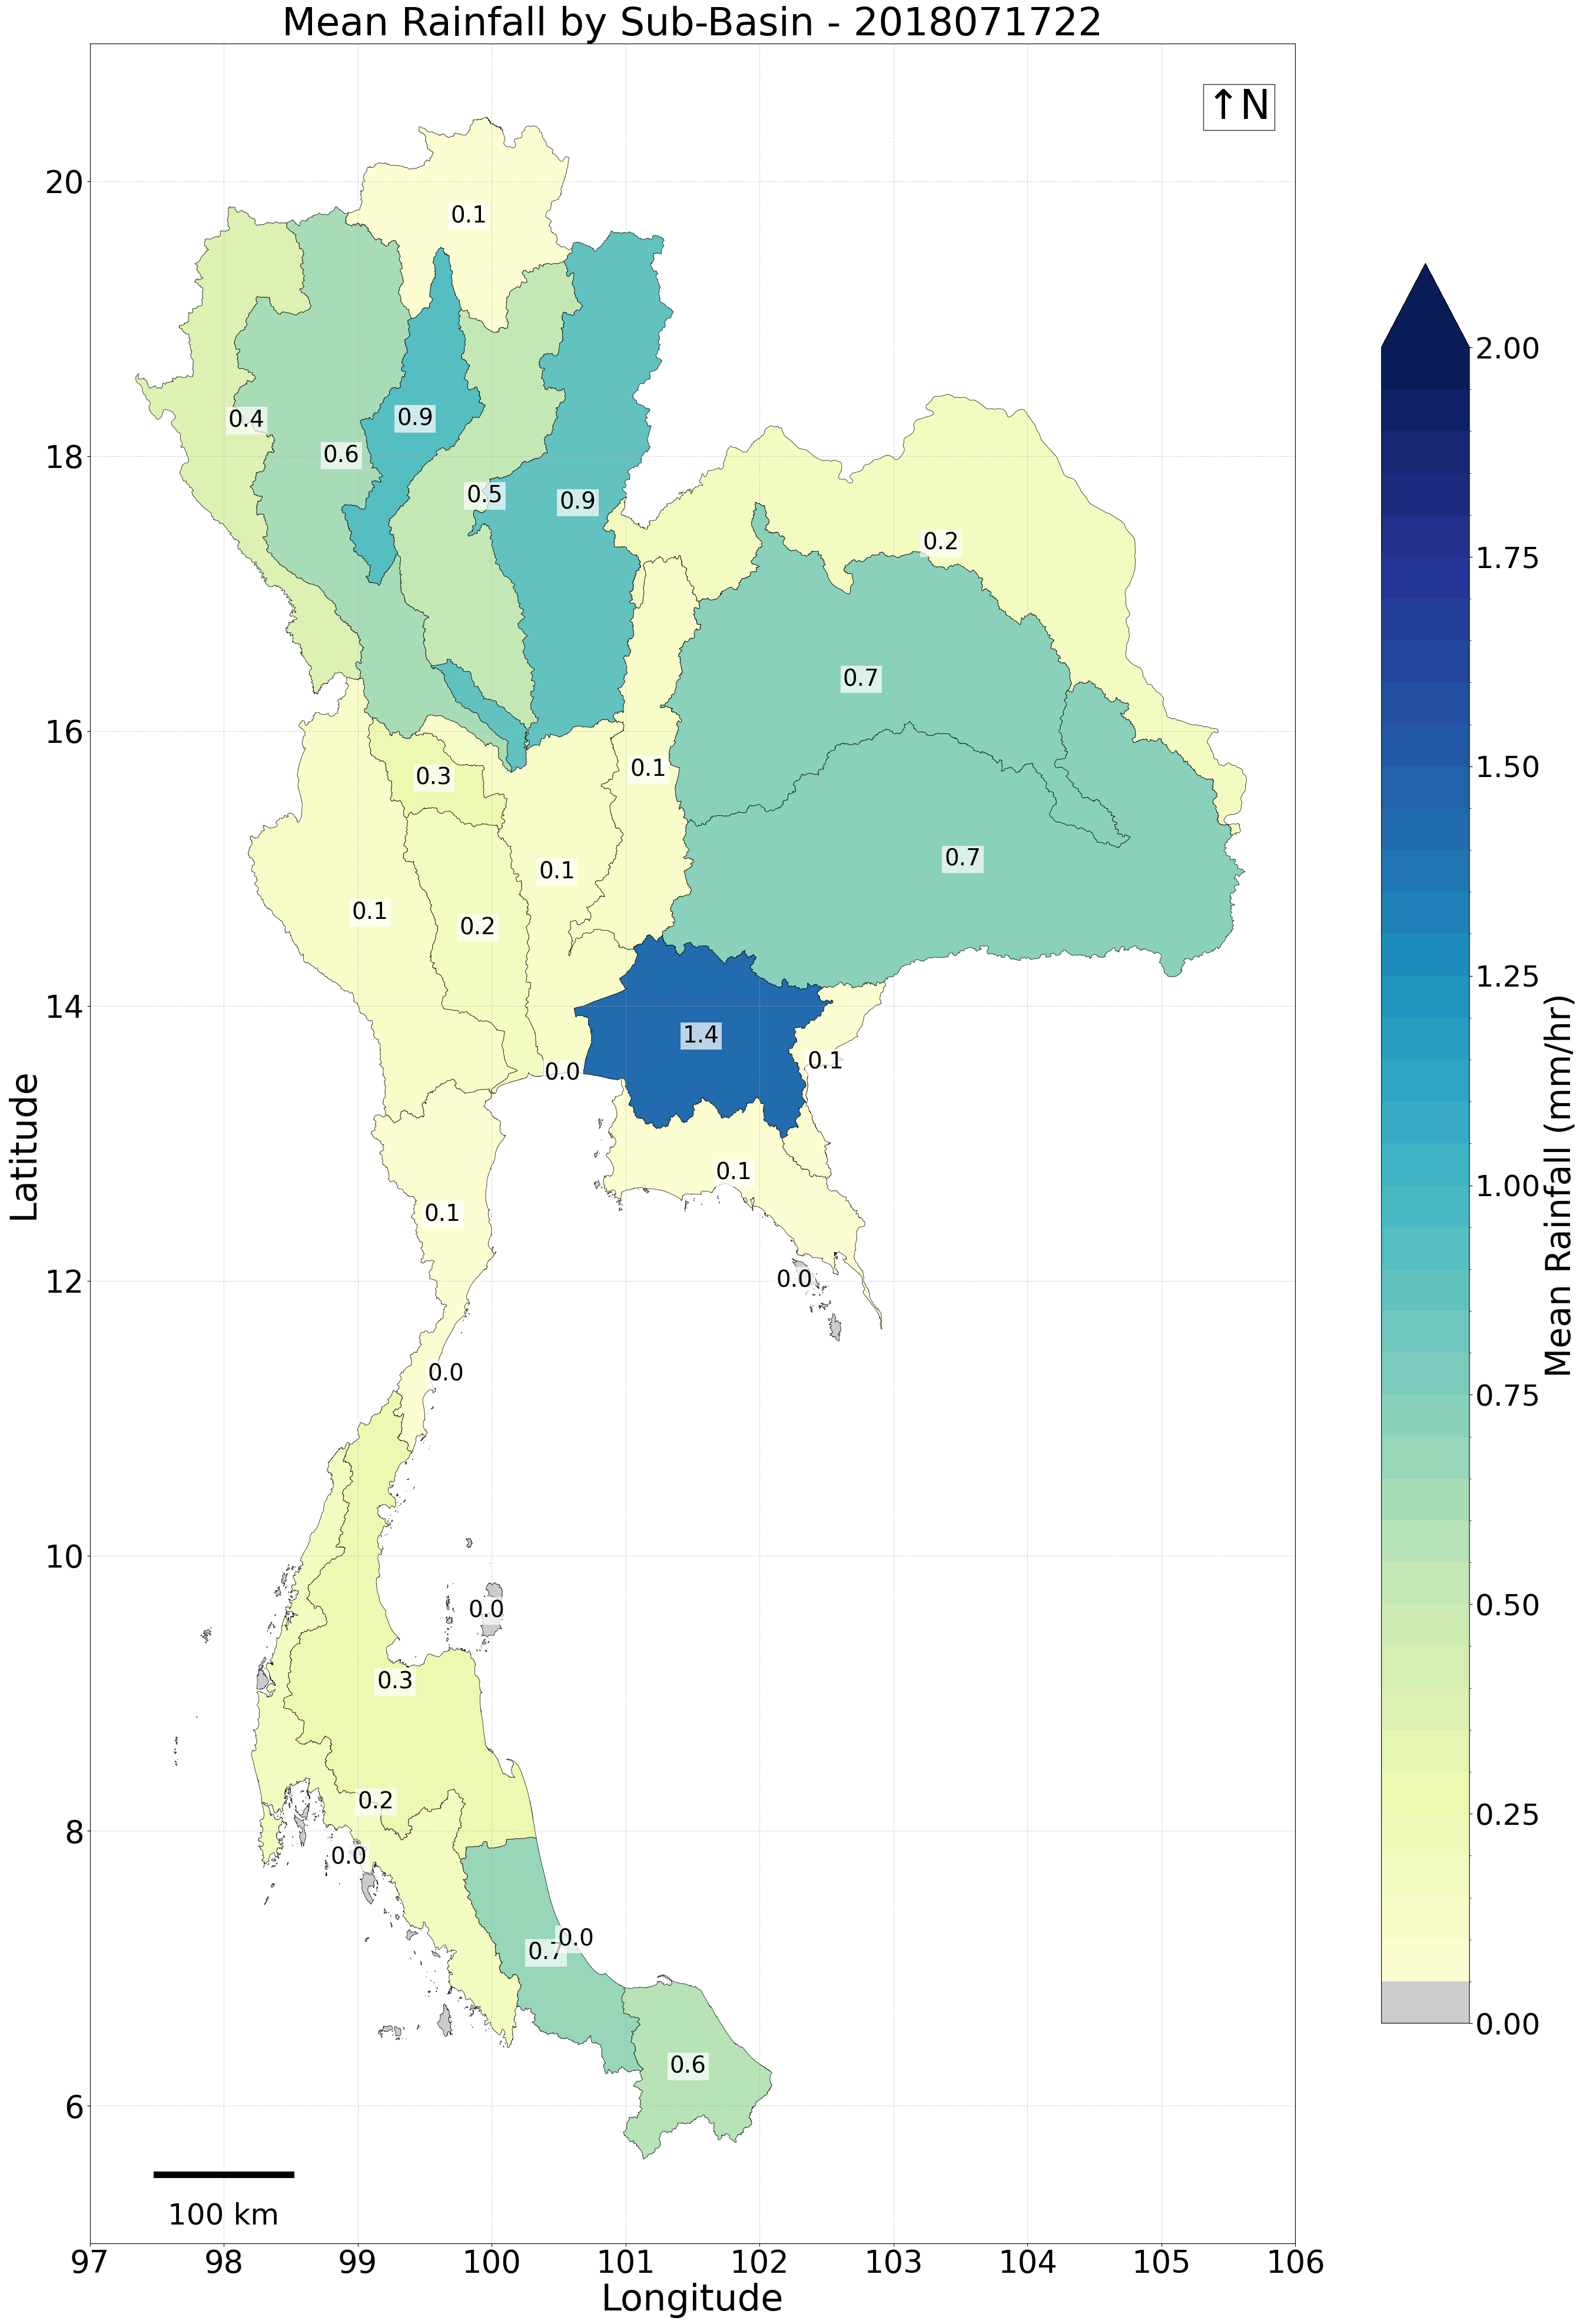

In [20]:
'''
2024.09.22
โค้ดนี้พัฒนาโดย รองศาสตราจารย์ ดร. นัฐพล มหาวิค ภาควิชาทรัพยากรธรรมชาติและสิ่งแวดล้อม คณะเกษตรศาสตร์ฯ มหาวิทยาลัยนเรศวร 
ในงานวิจัย เรื่อง "การวิจัยและพัฒนาผลิตภัณฑ์โมเสคฝนประมาณค่าจากเรดาร์ตรวจอากาศในพื้นที่ระดับลุ่มน้ำของประเทศไทยด้วยเทคโนโลยีภูมิสารสนเทศรหัสเปิด"
สนับสนุนทุนวิจัยโดยสํานักงานการวิจัยแห่งชาติ (วช.)  แผนงานการวิจัยและนวัตกรรมแผนงานด้านการบริหารจัดการภัยพิบัติทางธรรมชาติ 
ประจำปีงบประมาณ 2566  ตามสัญญา เลขที่ N25A660467 ผู้นำโค้ดนี้ไปใช้หรือดัดแปลงควรอ้างอิงงานวิจัยชิ้นนี้ตามหลักเกณฑ์การอ้างอิงสากล 
'''
#พลอต zonal mean สำหรับลุ่มน้ำในประเทศไทย หนึ่งชั่วโมง เซฟเป็น shapefile
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
import rasterio
from rasterio.mask import mask
import math
import matplotlib.colors as mcolors

def calculate_zonal_statistics(raster_path, sub_basins_path):
    # Read the sub-basins shapefile
    sub_basins = gpd.read_file(sub_basins_path)

    with rasterio.open(raster_path) as src:
        # Ensure the sub-basins are in the same CRS as the raster
        if sub_basins.crs != src.crs:
            sub_basins = sub_basins.to_crs(src.crs)

        # Calculate zonal statistics
        def calculate_mean(geometry):
            try:
                out_image, out_transform = mask(src, [geometry], crop=True)
                out_image = out_image.squeeze()  # Remove single-dimensional entries
                # Use np.nanmean to calculate the mean, ignoring NaN values
                return np.nanmean(out_image[out_image != src.nodata])
            except ValueError:
                return np.nan

        sub_basins['mean_rainfall'] = sub_basins.geometry.apply(calculate_mean)

    return sub_basins

def plot_zonal_statistics_map(sub_basins, time_hr, output_path=None):
    # Remove nan values for proper color scaling
    valid_data = sub_basins['mean_rainfall'].dropna()
    
    # Define classification breaks with rounded vmax
    vmin = 0
    vmax = 2
    #vmax = min(100, math.ceil(valid_data.max()))  # Round up to nearest integer, cap at 100 mm/hr
    breaks = np.linspace(vmin, vmax, 41)  # 40 classes

    # Create a custom colormap with grey for 0 mm
    #colors = plt.cm.jet(np.linspace(0, 1, 256))
    colors = plt.cm.YlGnBu(np.linspace(0, 1, 256))
    colors[0] = [0.8, 0.8, 0.8, 1.0]  # Set the first color (0 mm) to grey
    custom_cmap = mcolors.ListedColormap(colors)
    
    norm = BoundaryNorm(breaks, custom_cmap.N)

    # Increase base font size
    plt.rcParams.update({'font.size': 24})

    # Create the plot with larger figure size
    fig, ax = plt.subplots(figsize=(30, 40))

    # Plot the sub-basins
    sub_basins.plot(column='mean_rainfall', ax=ax, cmap=custom_cmap, norm=norm, 
                    edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})

    # Customize the plot
    ax.set_title(f'Mean Rainfall by Sub-Basin - {time_hr}', fontsize=48)
    
    # Add colorbar with larger font
    sm = ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, extend='max', shrink=0.8)
    cbar.set_label('Mean Rainfall (mm/hr)', fontsize=42)
    cbar.ax.tick_params(labelsize=36)

    # Add text labels for sub-basins with larger font
    for idx, row in sub_basins.iterrows():
        if not np.isnan(row['mean_rainfall']):
            ax.annotate(text=f"{row['mean_rainfall']:.1f}", 
                        xy=row.geometry.centroid.coords[0],
                        ha='center', va='center', fontsize=28,
                        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))

    # Add coordinate labels with larger font
    ax.set_xlabel('Longitude', fontsize=45)
    ax.set_ylabel('Latitude', fontsize=45)
    ax.tick_params(axis='both', which='major', labelsize=38)
    
    # Set extent to cover Thailand
    ax.set_xlim(97, 106)
    ax.set_ylim(5, 21)

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add north arrow with larger font
    ax.text(0.98, 0.98, '↑N', transform=ax.transAxes, ha='right', va='top', fontsize=50,
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    # Add scale bar with larger font (approximate, assumes equirectangular projection)
    ax.plot([97.5, 98.5], [5.5, 5.5], 'k-', linewidth=8)
    ax.text(98, 5.3, '100 km', ha='center', va='top', fontsize=36)

    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

def main(base_dir, basin_shapefile, time_hr, output_dir):
    # Create output directories
    shapefile_dir = os.path.join(output_dir, "0hourly_shapefile")
    mapplot_dir = os.path.join(output_dir, "0hourly_mapplot")
    os.makedirs(shapefile_dir, exist_ok=True)
    os.makedirs(mapplot_dir, exist_ok=True)
    
    # Construct the raster path
    raster_path = os.path.join(base_dir, f"{time_hr}.tif")
    
    # Calculate zonal statistics
    sub_basins_with_stats = calculate_zonal_statistics(raster_path, basin_shapefile)
    
    # Plot and save the map
    output_path = os.path.join(mapplot_dir, f"{time_hr}.png")
    plot_zonal_statistics_map(sub_basins_with_stats, time_hr, output_path)
    print(f"Zonal statistics map saved to: {output_path}")   
    
    # Save shapefile for each time step
    shapefile_output = os.path.join(shapefile_dir, f"{time_hr}.shp")
    sub_basins_with_stats.to_file(shapefile_output)
    print(f"Shapefile saved to: {shapefile_output}")    
     

if __name__ == "__main__":
    BASE_DIR = "../00run_batch_acchr_codes/2output/0Hourly/0Sontihn_dbz_single/0mosaic/2max_mos/0mosaics/0mfb"
    BASIN_SHAPEFILE = "../1data/1GIS/0base_map_gis/MainBasin_ONWR_Law_WGS84Geo.shp"
    MOSAIC_REPORT_PATH = '../00run_batch_acchr_codes/2output/0Hourly/0Sontihn_dbz_single/0mosaic/2max_mos/0mosaics/mosaic_report.csv'
    TIME_HR = "2018071722"
    OUTPUT_DIR = "./0Zprocessing_data/zonal_stats_output"

    main(BASE_DIR, BASIN_SHAPEFILE, TIME_HR, OUTPUT_DIR)

# พลอต zonal mean สำหรับลุ่มน้ำย่อยในประเทศไทย หนึ่งชั่วโมง เซฟเป็น shapefile

Zonal statistics map saved to: ./0Zprocessing_data/zonal_stats_output_sub_basin\0hourly_mapplot\2018071722.png


C:\Users\Admin\AppData\Local\Temp\ipykernel_20736\664221915.py:129: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sub_basins_with_stats.to_file(shapefile_output)


Shapefile saved to: ./0Zprocessing_data/zonal_stats_output_sub_basin\0hourly_shapefile\2018071722.shp


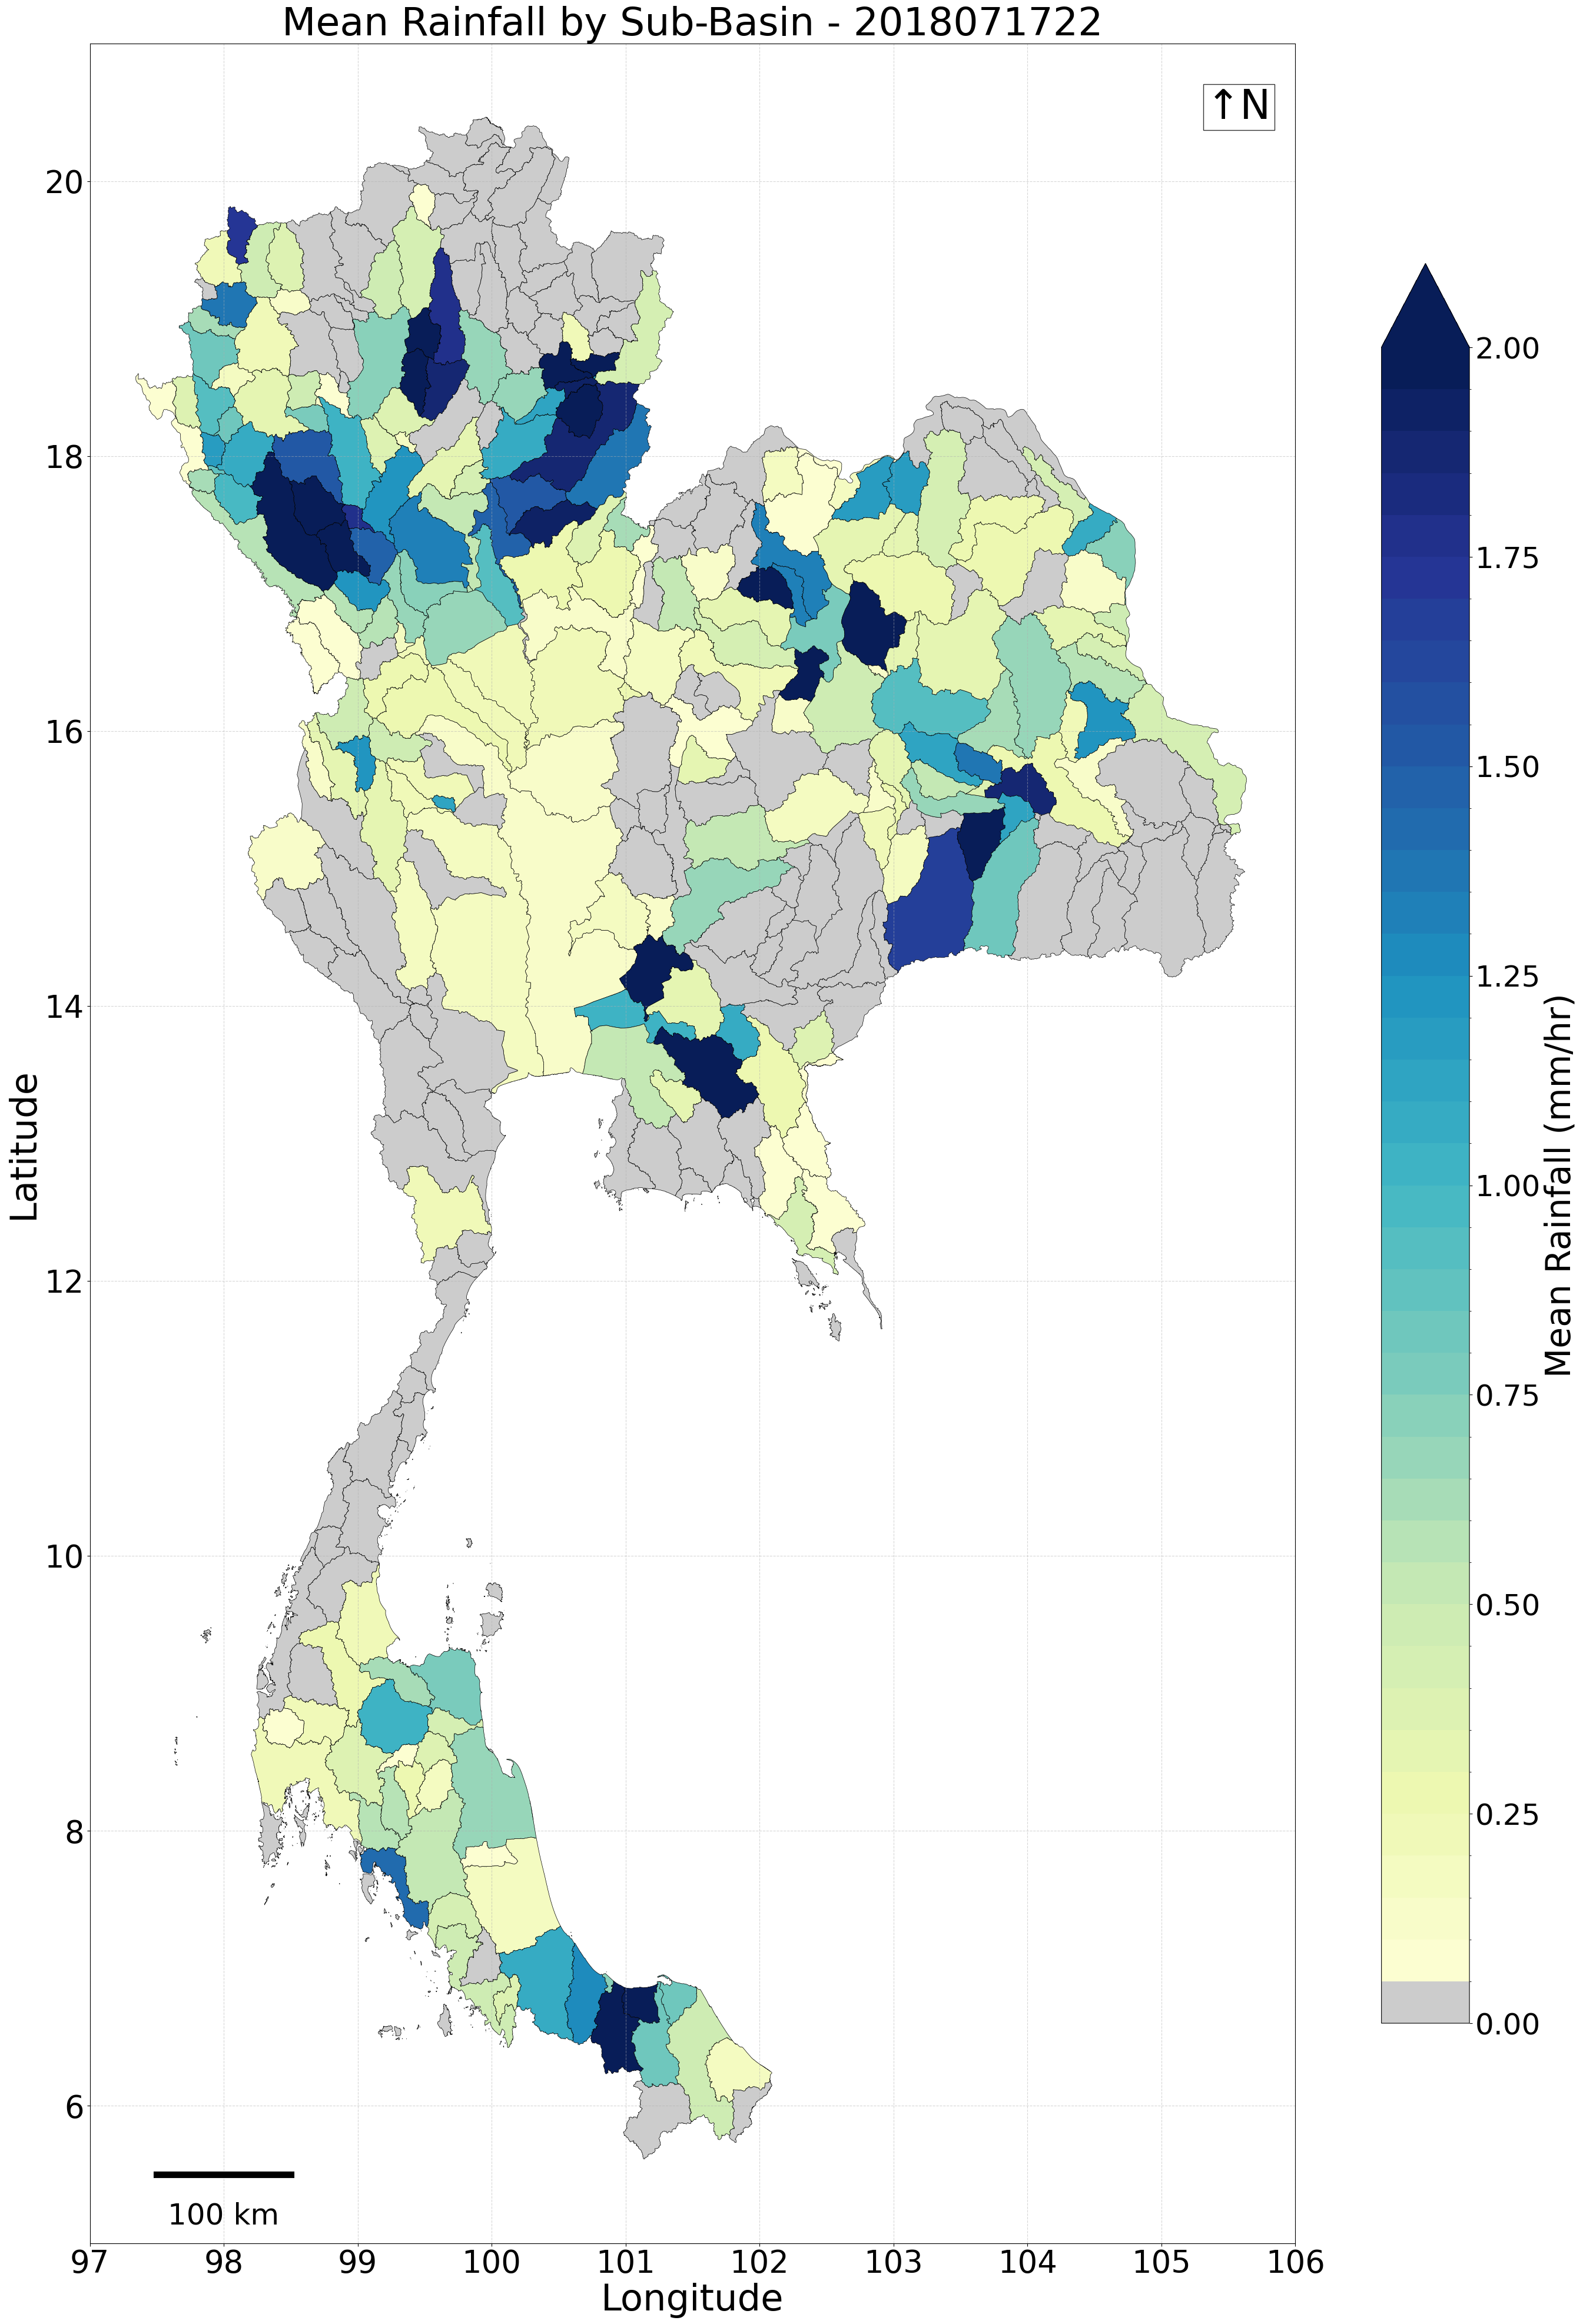

In [22]:
'''
2024.09.22
โค้ดนี้พัฒนาโดย รองศาสตราจารย์ ดร. นัฐพล มหาวิค ภาควิชาทรัพยากรธรรมชาติและสิ่งแวดล้อม คณะเกษตรศาสตร์ฯ มหาวิทยาลัยนเรศวร 
ในงานวิจัย เรื่อง "การวิจัยและพัฒนาผลิตภัณฑ์โมเสคฝนประมาณค่าจากเรดาร์ตรวจอากาศในพื้นที่ระดับลุ่มน้ำของประเทศไทยด้วยเทคโนโลยีภูมิสารสนเทศรหัสเปิด"
สนับสนุนทุนวิจัยโดยสํานักงานการวิจัยแห่งชาติ (วช.)  แผนงานการวิจัยและนวัตกรรมแผนงานด้านการบริหารจัดการภัยพิบัติทางธรรมชาติ 
ประจำปีงบประมาณ 2566  ตามสัญญา เลขที่ N25A660467 ผู้นำโค้ดนี้ไปใช้หรือดัดแปลงควรอ้างอิงงานวิจัยชิ้นนี้ตามหลักเกณฑ์การอ้างอิงสากล 
'''
#พลอต zonal mean สำหรับลุ่มน้ำย่อยในประเทศไทย หนึ่งชั่วโมง เซฟเป็น shapefile
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
import rasterio
from rasterio.mask import mask
import math
import matplotlib.colors as mcolors

def calculate_zonal_statistics(raster_path, sub_basins_path):
    # Read the sub-basins shapefile
    sub_basins = gpd.read_file(sub_basins_path)

    with rasterio.open(raster_path) as src:
        # Ensure the sub-basins are in the same CRS as the raster
        if sub_basins.crs != src.crs:
            sub_basins = sub_basins.to_crs(src.crs)

        # Calculate zonal statistics
        def calculate_mean(geometry):
            try:
                out_image, out_transform = mask(src, [geometry], crop=True)
                out_image = out_image.squeeze()  # Remove single-dimensional entries
                # Use np.nanmean to calculate the mean, ignoring NaN values
                return np.nanmean(out_image[out_image != src.nodata])
            except ValueError:
                return np.nan

        sub_basins['mean_rainfall'] = sub_basins.geometry.apply(calculate_mean)

    return sub_basins

def plot_zonal_statistics_map(sub_basins, time_hr, output_path=None):
    # Remove nan values for proper color scaling
    valid_data = sub_basins['mean_rainfall'].dropna()
    
    # Define classification breaks with rounded vmax
    vmin = 0
    vmax = 2
    #vmax = min(100, math.ceil(valid_data.max()))  # Round up to nearest integer, cap at 100 mm/hr
    breaks = np.linspace(vmin, vmax, 41)  # 40 classes

    # Create a custom colormap with grey for 0 mm
    #colors = plt.cm.jet(np.linspace(0, 1, 256))
    colors = plt.cm.YlGnBu(np.linspace(0, 1, 256))
    colors[0] = [0.8, 0.8, 0.8, 1.0]  # Set the first color (0 mm) to grey
    custom_cmap = mcolors.ListedColormap(colors)
    
    norm = BoundaryNorm(breaks, custom_cmap.N)

    # Increase base font size
    plt.rcParams.update({'font.size': 24})

    # Create the plot with larger figure size
    fig, ax = plt.subplots(figsize=(30, 40))

    # Plot the sub-basins
    sub_basins.plot(column='mean_rainfall', ax=ax, cmap=custom_cmap, norm=norm, 
                    edgecolor='black', linewidth=0.5, missing_kwds={'color': 'lightgrey'})

    # Customize the plot
    ax.set_title(f'Mean Rainfall by Sub-Basin - {time_hr}', fontsize=48)
    
    # Add colorbar with larger font
    sm = ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, extend='max', shrink=0.8)
    cbar.set_label('Mean Rainfall (mm/hr)', fontsize=42)
    cbar.ax.tick_params(labelsize=36)

    # Add text labels for sub-basins with larger font
    #for idx, row in sub_basins.iterrows():
    #    if not np.isnan(row['mean_rainfall']):
    #        ax.annotate(text=f"{row['mean_rainfall']:.1f}", 
    #                    xy=row.geometry.centroid.coords[0],
    #                    ha='center', va='center', fontsize=28,
    #                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))

    # Add coordinate labels with larger font
    ax.set_xlabel('Longitude', fontsize=45)
    ax.set_ylabel('Latitude', fontsize=45)
    ax.tick_params(axis='both', which='major', labelsize=38)
    
    # Set extent to cover Thailand
    ax.set_xlim(97, 106)
    ax.set_ylim(5, 21)

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add north arrow with larger font
    ax.text(0.98, 0.98, '↑N', transform=ax.transAxes, ha='right', va='top', fontsize=50,
            bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

    # Add scale bar with larger font (approximate, assumes equirectangular projection)
    ax.plot([97.5, 98.5], [5.5, 5.5], 'k-', linewidth=8)
    ax.text(98, 5.3, '100 km', ha='center', va='top', fontsize=36)

    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()

def main(base_dir, basin_shapefile, time_hr, output_dir):
    # Create output directories
    shapefile_dir = os.path.join(output_dir, "0hourly_shapefile")
    mapplot_dir = os.path.join(output_dir, "0hourly_mapplot")
    os.makedirs(shapefile_dir, exist_ok=True)
    os.makedirs(mapplot_dir, exist_ok=True)
    
    # Construct the raster path
    raster_path = os.path.join(base_dir, f"{time_hr}.tif")
    
    # Calculate zonal statistics
    sub_basins_with_stats = calculate_zonal_statistics(raster_path, basin_shapefile)
    
    # Plot and save the map
    output_path = os.path.join(mapplot_dir, f"{time_hr}.png")
    plot_zonal_statistics_map(sub_basins_with_stats, time_hr, output_path)
    print(f"Zonal statistics map saved to: {output_path}")   
    
    # Save shapefile for each time step
    shapefile_output = os.path.join(shapefile_dir, f"{time_hr}.shp")
    sub_basins_with_stats.to_file(shapefile_output)
    print(f"Shapefile saved to: {shapefile_output}")    
     

if __name__ == "__main__":
    BASE_DIR = "../00run_batch_acchr_codes/2output/0Hourly/0Sontihn_dbz_single/0mosaic/2max_mos/0mosaics/0mfb"
    BASIN_SHAPEFILE = "../1data/1GIS/0base_map_gis/SubBasin_DWR_WGS84.shp"
    MOSAIC_REPORT_PATH = '../00run_batch_acchr_codes/2output/0Hourly/0Sontihn_dbz_single/0mosaic/2max_mos/0mosaics/mosaic_report.csv'
    TIME_HR = "2018071722"
    OUTPUT_DIR = "./0Zprocessing_data/zonal_stats_output_sub_basin"

    main(BASE_DIR, BASIN_SHAPEFILE, TIME_HR, OUTPUT_DIR)